In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt

In [3]:
def sir_ode(times=[0,200],init=[0.95,0.05,0],parms=[0.1,0.05]):
        b,g = parms
        S,I,R = init
        dS = -b*S*I
        dI = b*S*I-g*I
        dR = g*I
        return [dS,dI,dR]


In [23]:
times = np.linspace(0,200,2001)
parms = [0.1,0.05]
init = [0.95,0.05,0.0]

In [24]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t,y,parms),t_span=[min(times),max(times)],y0=init,t_eval=times)

sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})


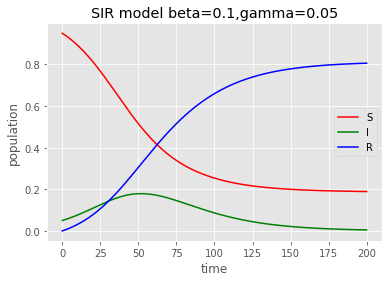

In [26]:
plt.plot('t','S', color='red', data=sir_out)
plt.plot('t','I', color='green',data=sir_out)
plt.plot('t','R', color='blue',data=sir_out)
plt.title("SIR model beta=0.1,gamma=0.05")
plt.xlabel("time")
plt.ylabel("population")
legend = plt.legend()